# Ejemplo de uso del módulo: Amplificador con BJT óptimo
### Diseñe un amplificador con punto Q a mitad de recta de carga con las siguientes características: 
$V_{CC}=10 \hspace{0.1cm} V, \quad R_L = 1 \hspace{0.1cm} k\Omega, \quad A_V = 10$

In [1]:
import numpy as np
import divisor as dv

#Especificaciones 
IE = 1e-3          #Nota: Se da un valor estimado de corriente
re = 25e-3/IE
rec = 220
RL = 10e3
A = 10

### Resistencia de colector

In [2]:
RC = RL/(RL/(A*(re+rec))-1)
print(RC)

3245.0331125827815


In [3]:
# Valor comercial más cercano
RC = dv.closest(RC)
print(RC)

3300.0


### Resistencia de emisor

In [4]:
rc = RL*RC/(RL+RC)
RE = (RC+rc)/(10-1)
print(RE)

642.3558897243107


In [5]:
# Valor comercial más cercano
RE = dv.closest(RE)
print(RE)

680.0


### Divisor de voltaje

In [6]:
#Seleccionamos un valor comercial estandar para R2:
R2 = 1.2e3

#Calculamos R1:
kr = dv.k_r(10.0/1.7) # Vcc/Vout
R1 = dv.R1_given_R2(R2,kr)
print(R1)

5858.823529411765


In [7]:
# Valor comercial más cercano
R1 = dv.closest(R1)
print(R1)

5600.0


### Valores de resistencias ($\Omega$) :

In [8]:
from IPython.display import display, Math, Latex
display(Math(r'R_1 = {} \quad R_2 ={} \quad R_C={} \quad R_E={}'.format(R1,R2,RC,RE)))

<IPython.core.display.Math object>

### Gráfica de datos de simulación con LTspice

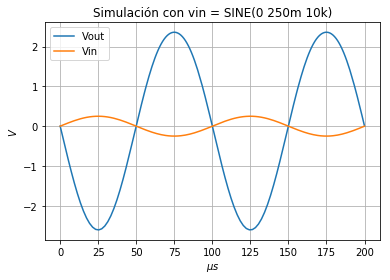

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#Cargar datos de simulación
df = pd.read_table('BJT_Amp_Q_optima.txt',sep='\t')

#Graficar
plt.plot(1e6*df['time'],df['V(vout)'],label='Vout')
plt.plot(1e6*df['time'],df['V(vin)'],label='Vin')
plt.title(u'Simulación con vin = SINE(0 250m 10k)')
plt.xlabel('$\mu s$')
plt.ylabel('$V$')
plt.legend()
plt.grid(True)
plt.show()